In [754]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import squarify    # pip install squarify (algorithm for treemap)


### Function

In [755]:
def std_anom(data,p,title):    
    data_anom = data.resample(p).sum()
    win_std = []
    for date in data_anom.index:
        #get the window ending at this data point
        window = data_anom.loc[:date].std()
        #get the deviation within this window
        win_std.append(window)

    rolling_deviations = pd.DataFrame(dtype=float, index = data_anom.index)
    rolling_deviations['std'] = win_std
    diff_rolling_deviations = rolling_deviations['std'].diff()
    diff_rolling_deviations = diff_rolling_deviations.dropna()
    plt.figure(figsize=(10,4))
    plt.plot(diff_rolling_deviations)
    plt.title(f'Deviation Differences: {title}', fontsize=20)
    plt.ylabel(title, fontsize=16)
    for year in range(1997,1998):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [756]:
def mean_anom(data,p,title):    
    data_anom = data.resample(p).sum()
    win_mean = []
    for date in data_anom.index:
        #get the window ending at this data point
        window = data_anom.loc[:date].mean()
        #get the mean within this window
        win_mean.append(window)

    rolling_means = pd.DataFrame(dtype=float, index = data_anom.index)
    rolling_means['mean'] = win_mean
    diff_rolling_means = rolling_means['mean'].diff()
    diff_rolling_means = diff_rolling_means.dropna()
    plt.figure(figsize=(10,4))
    plt.plot(diff_rolling_means)
    plt.title(f'Mean Differences: {title}', fontsize=20)
    plt.ylabel(title, fontsize=16)
    for year in range(1997,1998):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### Anomaly, Product, and Price Analysis 

In [757]:
data_product = pd.read_csv('../data/product_analysis.csv')
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   OrderDate            1059 non-null   object
 1   ProductName          1059 non-null   object
 2   UnitPrice            1059 non-null   object
 3   Quantity             1059 non-null   int64 
 4   Discount             1059 non-null   object
 5   UnitPriceDiscounted  1059 non-null   object
 6   TotalPrice           1059 non-null   object
dtypes: int64(1), object(6)
memory usage: 58.0+ KB


In [758]:
a,b = data_product.shape
for i in range(a):
    data_product['OrderDate'][i] = data_product.OrderDate.str.split(' ')[i][0]
data_product.index = pd.to_datetime(data_product.OrderDate)
data_product.drop('OrderDate',axis=1,inplace=True)

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_8106/2050520992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_product['OrderDate'][i] = data_product.OrderDate.str.split(' ')[i][0]


In [759]:
data_product.TotalPrice=data_product.TotalPrice.apply(lambda x: float(x.replace(",",".")))
data_product.UnitPriceDiscounted=data_product.UnitPriceDiscounted.apply(lambda x: float(x.replace(",",".")))
data_product.UnitPrice=data_product.UnitPrice.apply(lambda x: float(x.replace(",",".")))

In [760]:
revenue = data_product.groupby(data_product.index).agg({"TotalPrice":"sum",
                                                        "Quantity":"sum",
                                                        "UnitPrice":"sum",
                                                        "UnitPriceDiscounted":"sum"})
revenue.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 1997-01-01 to 1997-12-31
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalPrice           261 non-null    float64
 1   Quantity             261 non-null    int64  
 2   UnitPrice            261 non-null    float64
 3   UnitPriceDiscounted  261 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 10.2 KB


652813.726334


522250.9810672

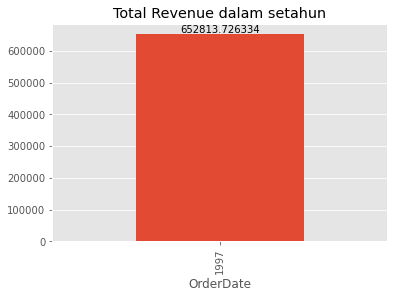

In [761]:
ax = revenue.groupby(revenue.index.year).agg({"TotalPrice":"sum",
                                        "Quantity":"sum",
                                         "UnitPrice":"sum",
                                        })['TotalPrice'].plot(kind='bar')
for i in ax.containers:
    for j in i:
        ax.text(j.get_x() + j.get_width()/2., j.get_y() + j.get_height()*1, j.get_height(), ha='center', va='bottom')
plt.title("Total Revenue dalam setahun")
print(revenue.TotalPrice.sum())
total_revenue = revenue.TotalPrice.sum()
total_revenue*0.8

Text(0.5, 1.0, 'Aktivitas Penjualan berdasarkan Revenue barang')

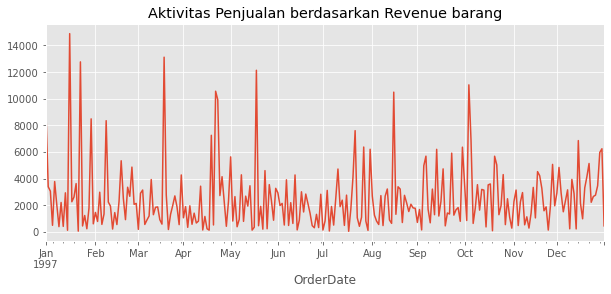

In [815]:
revenue.TotalPrice.plot(figsize=(10,4))
plt.title("Aktivitas Penjualan berdasarkan Revenue barang")

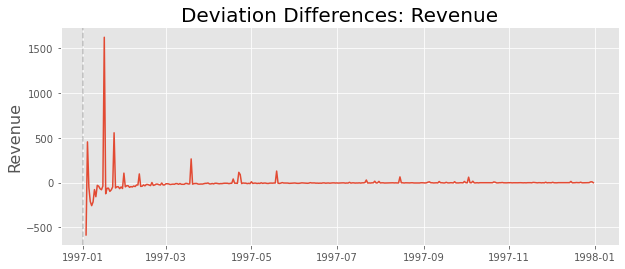

In [816]:
std_anom(revenue.TotalPrice,'D','Revenue')

Text(0.5, 1.0, 'Aktivitas Penjualan berdasarkan Kuantitas barang terjual')

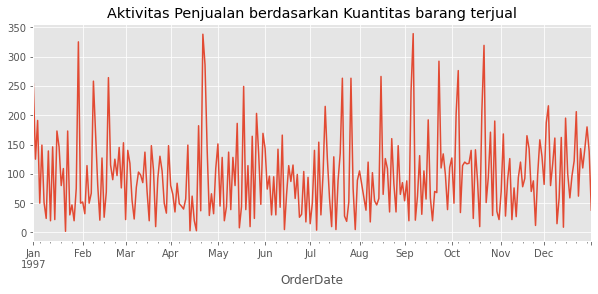

In [814]:
revenue.Quantity.plot(figsize=(10,4))
plt.title("Aktivitas Penjualan berdasarkan Kuantitas barang terjual")

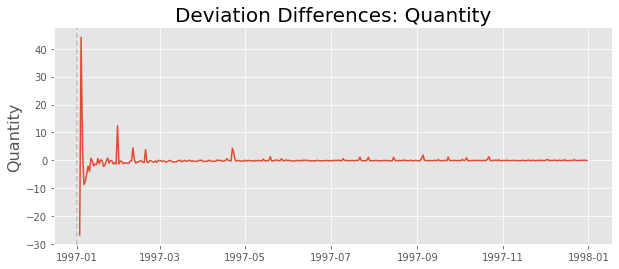

In [765]:
std_anom(revenue.Quantity,'D','Quantity')

Text(0.5, 1.0, 'Total Revenue')

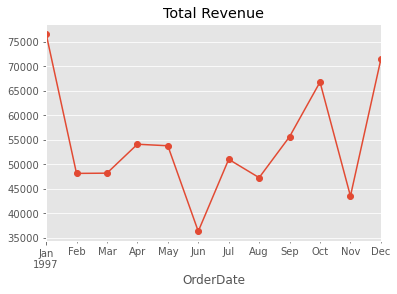

In [766]:
revenue.TotalPrice.loc[revenue.index.year<1998].resample('M').sum().plot(kind='line',style="-o")
plt.title('Total Revenue')

Text(0.5, 1.0, 'Quantity')

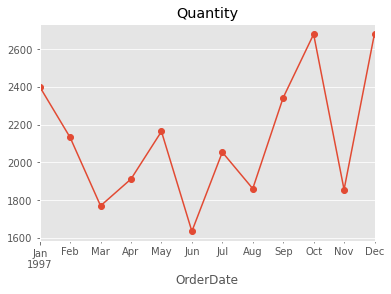

In [767]:
revenue.Quantity.loc[revenue.index.year<1998].resample('M').sum().plot(kind='line',style="-o")
plt.title('Quantity')


In [768]:
product_yeild = data_product.groupby(data_product.ProductName).agg({"TotalPrice":"sum",
                                                        "Quantity":"sum",
                                                        "UnitPrice":"sum",
                                                        "UnitPriceDiscounted":"sum"}).reset_index()
product_yeild['AvgDiscount'] = (product_yeild.UnitPrice - product_yeild.UnitPriceDiscounted)/product_yeild.UnitPrice
product_selected = product_yeild[['ProductName','TotalPrice']]
product_selected = product_selected.sort_values(by='TotalPrice',ascending=False)
print(total_revenue*0.8)
product_selected.TotalPrice[:40].sum()


522250.9810672


545579.3543070001

<Figure size 1440x720 with 0 Axes>

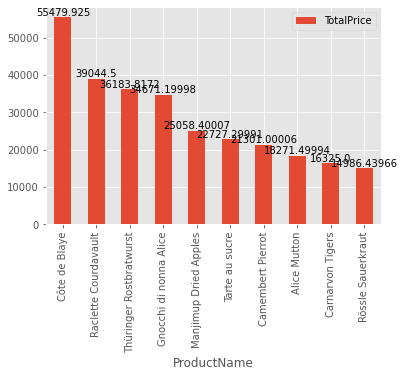

In [800]:
plt.figure(figsize=(20, 10))
ax = product_selected.iloc[:10].plot(x="ProductName",kind='bar')
for i in ax.containers:
    for j in i:
        ax.text(j.get_x() + j.get_width()/2., j.get_y() + j.get_height()*1, j.get_height(), ha='center', va='bottom')

In [779]:
arr_product = product_selected['ProductName'].to_numpy()
data_product_selected = data_product.copy()
#data_product_selected['ProductName'] = data_product_selected['ProductName'].apply(lambda x: x if x in arr_product else "Others (37 Items)" )
# data_product_selected['ProductName'] = data_product_selected['ProductName'].apply(lambda x: x if x in arr_product else "Others (37 Items)" )
# data_product_selected = data_product_selected.groupby("ProductName").agg({"TotalPrice":"sum","Quantity":"sum"}).reset_index()
# data_product_selected = data_product_selected.sort_values(by="TotalPrice",ascending=False)
data_product_selected.ProductName.nunique()

77

In [770]:
arr_product

array(['Côte de Blaye', 'Raclette Courdavault', 'Thüringer Rostbratwurst',
       'Gnocchi di nonna Alice', 'Manjimup Dried Apples',
       'Tarte au sucre', 'Camembert Pierrot', 'Alice Mutton',
       'Carnarvon Tigers', 'Rössle Sauerkraut', 'Gudbrandsdalsost',
       'Mozzarella di Giovanni', 'Perth Pasties', 'Ipoh Coffee',
       'Schoggi Schokolade', 'Gumbär Gummibärchen', 'Boston Crab Meat',
       'Ikura', 'Louisiana Fiery Hot Pepper Sauce', "Sirop d'érable",
       "Uncle Bob's Organic Dried Pears", 'Flotemysost', 'Pavlova',
       'Wimmers gute Semmelknödel', 'Pâté chinois',
       'Queso Manchego La Pastora', 'Vegie-spread', 'Lakkalikööri',
       'Chang', 'Gorgonzola Telino', 'Queso Cabrales',
       "Sir Rodney's Marmalade", 'Gula Malacca', 'Mishi Kobe Niku',
       'Inlagd Sill', 'Tofu', 'Nord-Ost Matjeshering', 'Outback Lager',
       'Singaporean Hokkien Fried Mee', "Sir Rodney's Scones",
       'Steeleye Stout', "Chef Anton's Cajun Seasoning",
       'Original Frankfurte

In [781]:
arr_product = product_selected['ProductName'].to_numpy()
data_product_selected = data_product.copy()

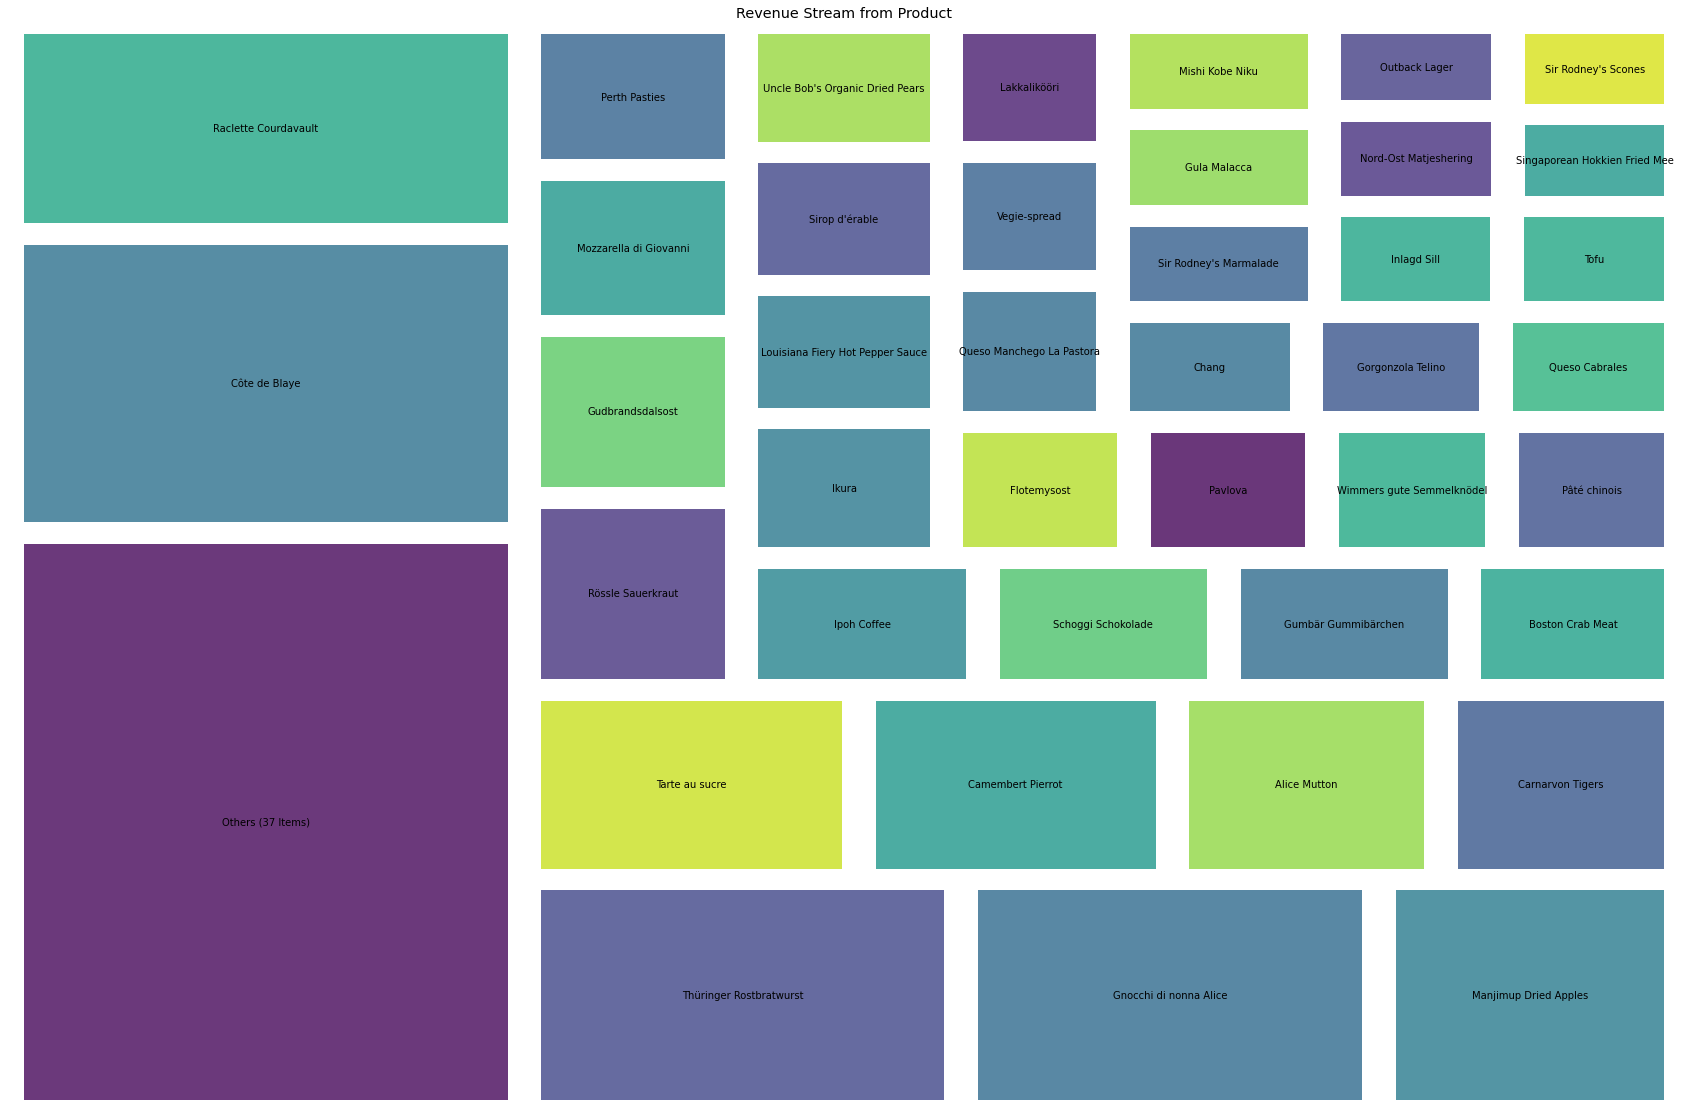

In [782]:
# 10 besar revenue tahun 1997
#fig = plt.figure(figsize=(14,6))
data_product_selected['ProductName'] = data_product_selected['ProductName'].apply(lambda x: x if x in arr_product else "Others (37 Items)" )
data_product_selected = data_product_selected.groupby("ProductName").agg({"TotalPrice":"sum","Quantity":"sum"}).reset_index()
data_product_selected = data_product_selected.sort_values(by="TotalPrice",ascending=False)
data_product_selected

plt.figure(figsize=(30, 20))
ax = squarify.plot(sizes=data_product_selected['TotalPrice'].iloc[:41], label=data_product_selected['ProductName'].iloc[:41], alpha=.8, pad = 10,color=plt.style.use('ggplot') )
plt.axis('off')
plt.title("Revenue Stream from Product")
plt.show()


Dari 77 produk, 40 produk mewakili lebih dari 80% revenue

In [772]:
product_selected=product_selected.iloc[:40]

### Shipper Customer and Market Size

In [773]:
data_customer = pd.read_csv('../data/customer_analysis.csv')
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OrderDate    1059 non-null   object
 1   ProductName  1059 non-null   object
 2   TotalPrice   1059 non-null   object
 3   ShipName     1059 non-null   object
 4   ShipCountry  1059 non-null   object
 5   IsEurophian  1059 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 49.8+ KB


In [774]:
a,b = data_product.shape
for i in range(a):
    data_customer['OrderDate'][i] = data_customer.OrderDate.str.split(' ')[i][0]
data_customer.index = pd.to_datetime(data_customer.OrderDate)
data_customer.drop('OrderDate',axis=1,inplace=True)

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_8106/443095753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_customer['OrderDate'][i] = data_customer.OrderDate.str.split(' ')[i][0]


In [775]:
data_customer.TotalPrice=data_customer.TotalPrice.apply(lambda x: float(x.replace(",",".")))
data_customer.IsEurophian=data_customer.IsEurophian.apply(lambda x: "Europhian" if x == 1 else "American")
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1059 entries, 1997-01-01 to 1997-12-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductName  1059 non-null   object 
 1   TotalPrice   1059 non-null   float64
 2   ShipName     1059 non-null   object 
 3   ShipCountry  1059 non-null   object 
 4   IsEurophian  1059 non-null   object 
dtypes: float64(1), object(4)
memory usage: 49.6+ KB


<Figure size 1080x576 with 0 Axes>

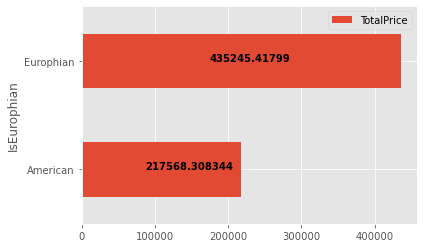

In [811]:
plt.figure(figsize=(15, 8))
data = data_customer.groupby("IsEurophian").agg({"TotalPrice":"sum"}).TotalPrice
ax = data_customer.groupby("IsEurophian").agg({"TotalPrice":"sum"}).plot(kind="barh")
for i, v in enumerate(data):
    ax.text(v/2.-v/10 , i  , str(v), color='black', fontweight='bold')

In [777]:
per_country = data_customer.groupby("ShipCountry").agg({"TotalPrice":"sum"}).sort_values(by="TotalPrice",ascending=False).reset_index()


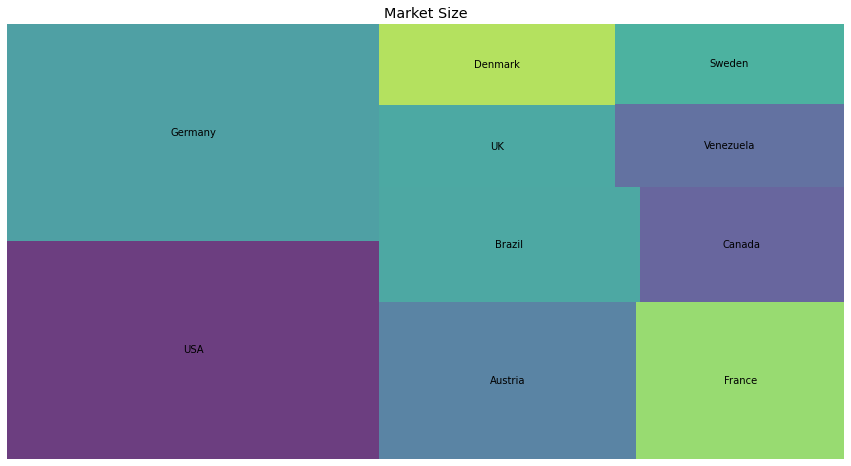

In [778]:
plt.figure(figsize=(15, 8))
squarify.plot(sizes=per_country['TotalPrice'].iloc[:10], label=per_country['ShipCountry'].iloc[:10], alpha=.8 )
plt.axis('off')
plt.title("Market Size")
plt.show()

In [813]:
ship_data = data_customer.groupby('ShipName').agg({"TotalPrice":"sum"}).sort_values(by='TotalPrice',ascending=False).reset_index()
print(total_revenue)

652813.726334
